## Looking at Calculation Values

In this notebook, we take a closer look at the single number quantities and some
tests. Please be familiar with the TutorialNotebook before looking at this
notebook.

First we set up out environment as before:


In [1]:
# Add ldcpy root to system path
import sys

sys.path.insert(0, '../../../')

# Import ldcpy package
# Autoreloads package everytime the package is called, so changes to code will be reflected in the notebook if the above sys.path.insert(...) line is uncommented.
%load_ext autoreload
%autoreload 2
# suppress all of the divide by zero warnings
import warnings

import ldcpy

warnings.filterwarnings("ignore")


# display the plots in this notebook
%matplotlib inline

As in the TutorialNotebook, we will use the surface temperature (TS) and
precipitation rate (PRECT) sample data from ldcpy. We make a collection using
ldcpy.open_datasets() for each variable.


In [16]:
# ts_col contains TS data
ts_col = ldcpy.open_datasets(
    "cam-fv",
    ["TS"],
    [
        "../../../data/cam-fv/orig.TS.100days.nc",
        "../../../data/cam-fv/zfp1.0.TS.100days.nc",
        "../../../data/cam-fv/zfp1e-1.TS.100days.nc",
        "../../../data/cam-fv/zfp1e-3.TS.100days.nc",
    ],
    ["orig", "zfp1.0", "zfp1e-1", "zfp1e-3"],
)
# prect_col contains PRECT data
prect_col = ldcpy.open_datasets(
    "cam-fv",
    ["PRECT"],
    [
        "../../../data/cam-fv/orig.PRECT.60days.nc",
        "../../../data/cam-fv/zfp1e-7.PRECT.60days.nc",
        "../../../data/cam-fv/zfp1e-9.PRECT.60days.nc",
        "../../../data/cam-fv/zfp1e-11.PRECT.60days.nc",
    ],
    ["orig", "zfp1e-7", "zfp1e-9", "zfp1e-11"],
)

dataset size in GB 0.09

dataset size in GB 0.05



## Surface Temperature

Let's look at the statistic for each of the three compressed variants of TS. The
zfp1.0 set has been compressed with an absolute error tolerance of 1.0, whereas
the zfp1e-1 and zfp1e-3 sets have been compressed with an absolute error
tolerance of 1.0e-1 and 1.0e-3, respectively. Therefore, we expect the second
set to be more accurate. We will just look at the first time slice.


In [18]:
data = ts_col.isel(time=0)
ldcpy.compare_stats(
    data, "TS", ["orig", "zfp1.0", "zfp1e-1", "zfp1e-3"], aggregate_dims=["lat", "lon"]
)

,orig,zfp1.0,zfp1e-1,zfp1e-3
mean,284.49,284.48,284.49,284.49
variance,329.95,329.8,329.94,329.95
standard deviation,18.165,18.16,18.164,18.165
min value,216.74,216.82,216.75,216.74
min (abs) nonzero value,216.74,216.82,216.75,216.74
max value,315.58,315.57,315.58,315.58
probability positive,1,1,1,1
number of zeros,0,0,0,0
spatial autocorr - latitude,0.99392,0.99391,0.99392,0.99392
spatial autocorr - longitude,0.9968,0.99679,0.9968,0.9968


,zfp1.0,zfp1e-1,zfp1e-3
max abs diff,0.40588,0.022919,0.00036621
min abs diff,0,0,0
mean abs diff,0.056513,0.0042215,6.5855e-05
mean squared diff,7.3205e-05,3.0499e-07,8.2256e-11
root mean squared diff,0.072954,0.0053253,8.4174e-05
normalized root mean squared diff,0.00076154,5.3982e-05,8.516e-07
normalized max pointwise error,0.0041064,0.00023187,3.705e-06
pearson correlation coefficient,0.99999,1,1
ks p-value,1,1,1
spatial relative error(% > 0.0001),68.958,0,0


In [7]:
# now using weighted averages
data = ts_col.isel(time=0)
ldcpy.compare_stats(
    data,
    "TS",
    ["orig", "zfp1.0", "zfp1e-1", "zfp1e-3"],
    weighted=True,
    aggregate_dims=["lat", "lon"],
)

,orig,zfp1.0,zfp1e-1,zfp1e-3
mean,284.49,284.48,284.49,284.49
variance,329.95,329.8,329.94,329.95
standard deviation,18.165,18.16,18.164,18.165
min value,216.74,216.82,216.75,216.74
min (abs) nonzero value,216.74,216.82,216.75,216.74
max value,315.58,315.57,315.58,315.58
probability positive,1,1,1,1
number of zeros,0,0,0,0
spatial autocorr - latitude,0.99392,0.99391,0.99392,0.99392
spatial autocorr - longitude,0.9968,0.99679,0.9968,0.9968


,zfp1.0,zfp1e-1,zfp1e-3
max abs diff,0.40588,0.022919,0.00036621
min abs diff,0,0,0
mean abs diff,0.056513,0.0042215,6.5855e-05
mean squared diff,7.3205e-05,3.0499e-07,8.2256e-11
root mean squared diff,0.072954,0.0053253,8.4174e-05
normalized root mean squared diff,0.00076154,5.3982e-05,8.516e-07
normalized max pointwise error,0.0041064,0.00023187,3.705e-06
pearson correlation coefficient,0.99999,1,1
ks p-value,1,1,1
spatial relative error(% > 0.0001),68.958,0,0


We can also use the check_metrics() function to see whether the first time slice
of any of these compressed variants passed the four tests (K-S, Pearson
Correlation, and Spatial Relative Error, and Data SSIM) suggested in:

A. H. Baker, H. Xu, D. M. Hammerling, S. Li, and J. Clyne, “Toward a
Multi-method Approach: Lossy Data Compression for Climate Simulation Data”, in
J.M. Kunkel et al. (Eds.): ISC High Performance Workshops 2017, Lecture Notes in
Computer Science 10524, pp. 30–42, 2017 (doi:10.1007/978-3-319-67630-2_3).

Note that the defaults for the tests are (and can be changed via optional
arguments):

    K-S test: fails if p-value < .05

    Pearson correlation coefficient test:  fails if coefficient < .99999

    Spatial relative error test: fails if > 5% of grid points fail relative error test

    Data SSIM test: fail if Data SSIM < .995


In [13]:
num_fails = ldcpy.check_metrics(data, "TS", "orig", "zfp1.0")

Evaluating 4 calcs for orig data (set1) and zfp1.0 data (set2):
<class 'xarray.core.dataarray.DataArray'>


TypeError: unsupported format string passed to Array.__format__

In [9]:
num_fails = ldcpy.check_metrics(data, "TS", "orig", "zfp1e-1")

Evaluating 4 calcs for orig data (set1) and zfp1e-1 data (set2):


TypeError: unsupported format string passed to Array.__format__

The Data SSIM test failed in the "zfp1.0" case- indicating a difference in the visualizations. Let's
take a look at plots of the values at time=0 (note that we specify start=0 and
end=1 to get the first slice):


In [ ]:
# comparison between mean TS values in col_ds for "orig" and "zfpA1.0" datasets at time=0
ldcpy.plot(ts_col, "TS", sets=["orig", "zfp1.0"], calc="mean", plot_type="spatial", start=0, end=1)

It's hard to see a difference here. Let's also look at the difference plot:


In [ ]:
# make a difference plot
ldcpy.plot(
    ts_col,
    "TS",
    sets=["orig", "zfp1.0"],
    calc="mean",
    plot_type="spatial",
    calc_type="diff",
    start=0,
    end=1,
)

So there are minor differences, which may or may not be important to subsequent
analysis. Note that we can adjust the SSIM tolerance to be less strict as
follows:


In [ ]:
num_fails = ldcpy.check_metrics(data, "TS", "orig", "zfp1e-1", ssim_tol=0.95)

Now we check the most conservative case (tol = 1e-3) and see that it passes all
tests (without modification).


In [10]:
num_fails = ldcpy.check_metrics(data, "TS", "orig", "zfp1e-3")

Evaluating 4 calcs for orig data (set1) and zfp1e-3 data (set2):
     PASSED pearson correlation coefficient test...(pcc = 1.00000 )
     PASSED ks test...(ks p_val = 1.0000 )
     PASSED spatial relative error test ...(spre = 0.00  %)
     PASSED DATA SSIM test ... (ssim = 0.99999 )


## Precipitation rate

We can similarly check the tests for the two different variants of compression
for PRECT. PRECT is a "harder" variable to compress than TS because it is less
smooth and has a larger range of magnitudes.


In [11]:
num_fails = ldcpy.check_metrics(prect_col.isel(time=0), "PRECT", "orig", "zfp1e-7")

Evaluating 4 calcs for orig data (set1) and zfp1e-7 data (set2):
     *FAILED pearson correlation coefficient test...(pcc = 0.99855 )
     *FAILED ks test...(ks p_val = 0.0000 )
     *FAILED spatial relative error test ... (spre = 94.81  %)
     *FAILED DATA SSIM test ... (ssim = 0.77288 )


This tolerance of 1e-7 is clearly not appropriate for PRECT. Look at the
original data:


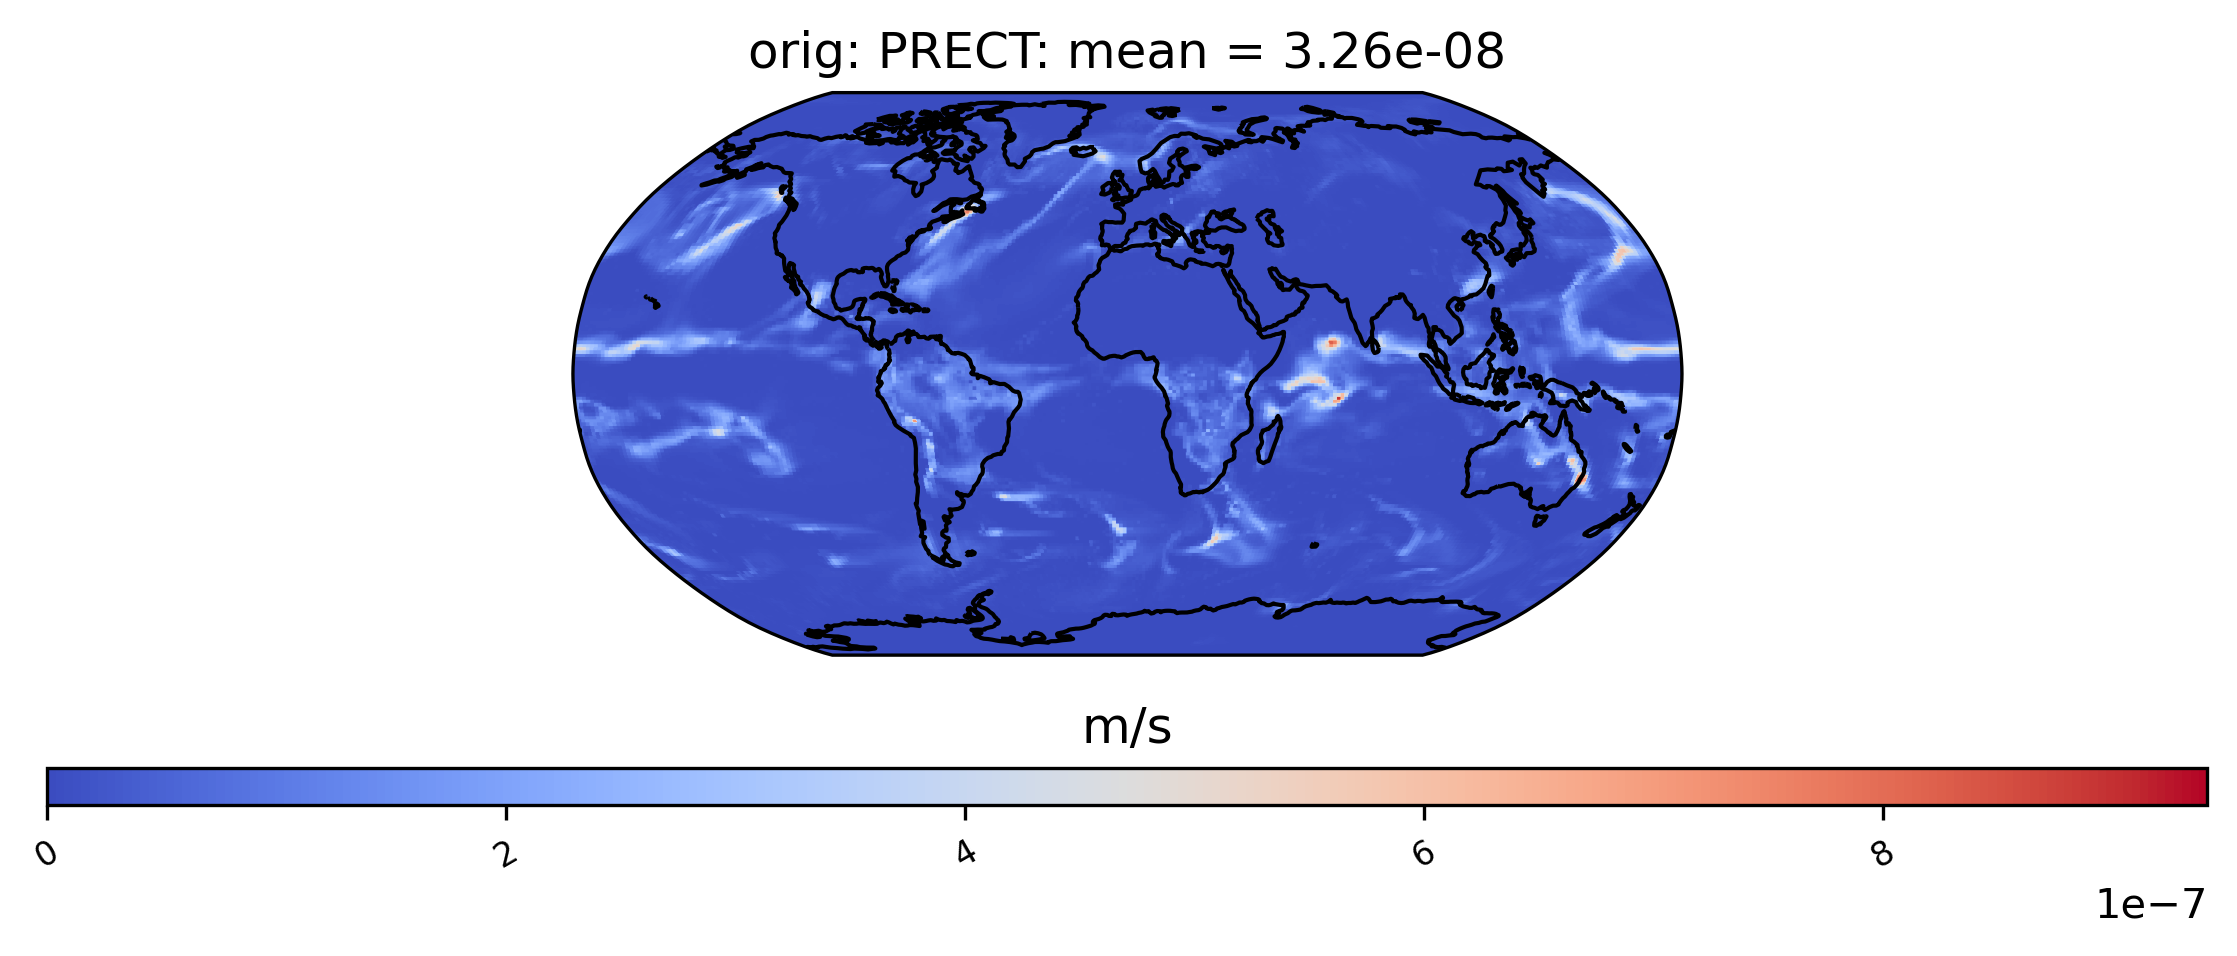

In [12]:
# plot of the mean values in the "orig" dataset
ldcpy.plot(prect_col, "PRECT", sets=["orig"], calc="mean", start=0, end=1)

And the compressed version is not very close...Let's look at the full stats and
then a difference plot.


In [13]:
ldcpy.compare_stats(
    prect_col.isel(time=0),
    "PRECT",
    ["orig", "zfp1e-7", "zfp1e-9", "zfp1e-11"],
)

,orig,zfp1e-7,zfp1e-9,zfp1e-11
mean,2.9062e-08,2.9033e-08,2.9063e-08,2.9062e-08
variance,4.6182e-15,4.636e-15,4.6182e-15,4.6182e-15
standard deviation,6.7957e-08,6.8088e-08,6.7957e-08,6.7957e-08
min value,-5.7434e-22,-1.8626e-08,-3.0559e-10,-2.3306e-12
min (abs) nonzero value,2.0515e-31,2.3283e-10,3.638e-12,2.8422e-14
max value,1.1832e-06,1.1695e-06,1.1832e-06,1.1832e-06
probability positive,0.94761,0.47882,0.72316,0.79952
number of zeros,2846,23842,8519,4909
99% real information cutoff bit,1,1,12,13
spatial autocorr - latitude,0.81632,0.81486,0.81632,0.81632


,zfp1e-7,zfp1e-9,zfp1e-11
max abs diff,2.1862e-08,3.4671e-10,2.8244e-12
min abs diff,0,0,0
mean abs diff,2.5308e-09,5.4734e-11,4.6107e-13
mean squared diff,8.8682e-22,9.7835e-27,6.8928e-30
root mean squared diff,3.9273e-09,7.4263e-11,6.0514e-13
normalized root mean squared diff,0.0031003,6.1691e-05,5.0771e-07
normalized max pointwise error,0.016603,0.00029304,2.3871e-06
pearson correlation coefficient,0.99855,1,1
ks p-value,0,0,0
spatial relative error(% > 0.0001),94.812,92.511,59.637


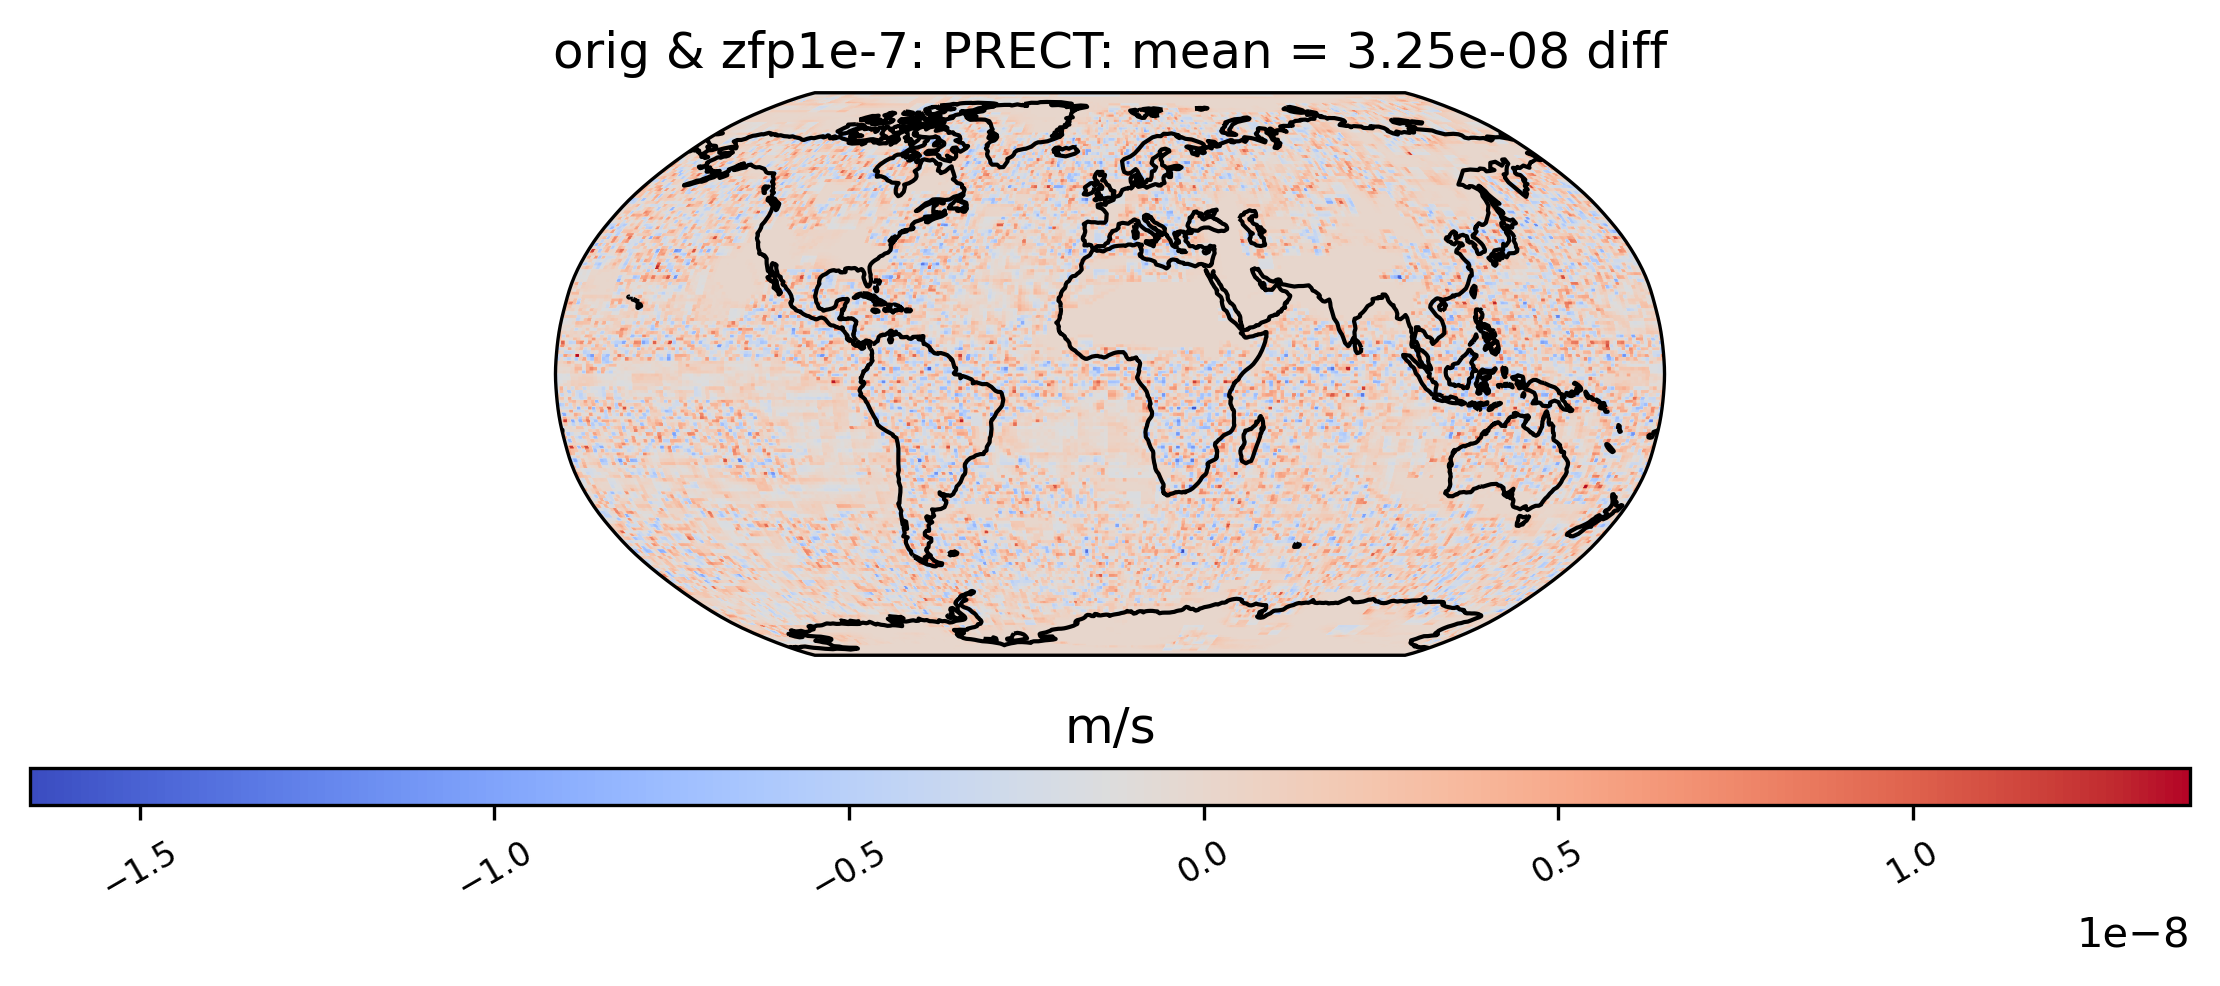

In [14]:
# make a difference plot
ldcpy.plot(
    prect_col,
    "PRECT",
    sets=["orig", "zfp1e-7"],
    calc="mean",
    plot_type="spatial",
    calc_type="diff",
    start=0,
    end=1,
)

Now let's look at the other 2:


In [15]:
num_fails = ldcpy.check_metrics(prect_col.isel(time=0), "PRECT", "orig", "zfp1e-9")

Evaluating 4 calcs for orig data (set1) and zfp1e-9 data (set2):
     PASSED pearson correlation coefficient test...(pcc = 1.00000 )
     *FAILED ks test...(ks p_val = 0.0000 )
     *FAILED spatial relative error test ... (spre = 92.51  %)
     *FAILED DATA SSIM test ... (ssim = 0.99411 )


In [16]:
num_fails = ldcpy.check_metrics(prect_col.isel(time=0), "PRECT", "orig", "zfp1e-11")

Evaluating 4 calcs for orig data (set1) and zfp1e-11 data (set2):
     PASSED pearson correlation coefficient test...(pcc = 1.00000 )
     *FAILED ks test...(ks p_val = 0.0000 )
     *FAILED spatial relative error test ... (spre = 59.64  %)
     PASSED DATA SSIM test ... (ssim = 0.99999 )


This last one with the zfp tolerance 1e-11 looks the best (but still fails 2 tests), but for this data
1e-12 would likely be a better choice. Let's look at  a
difference plot.


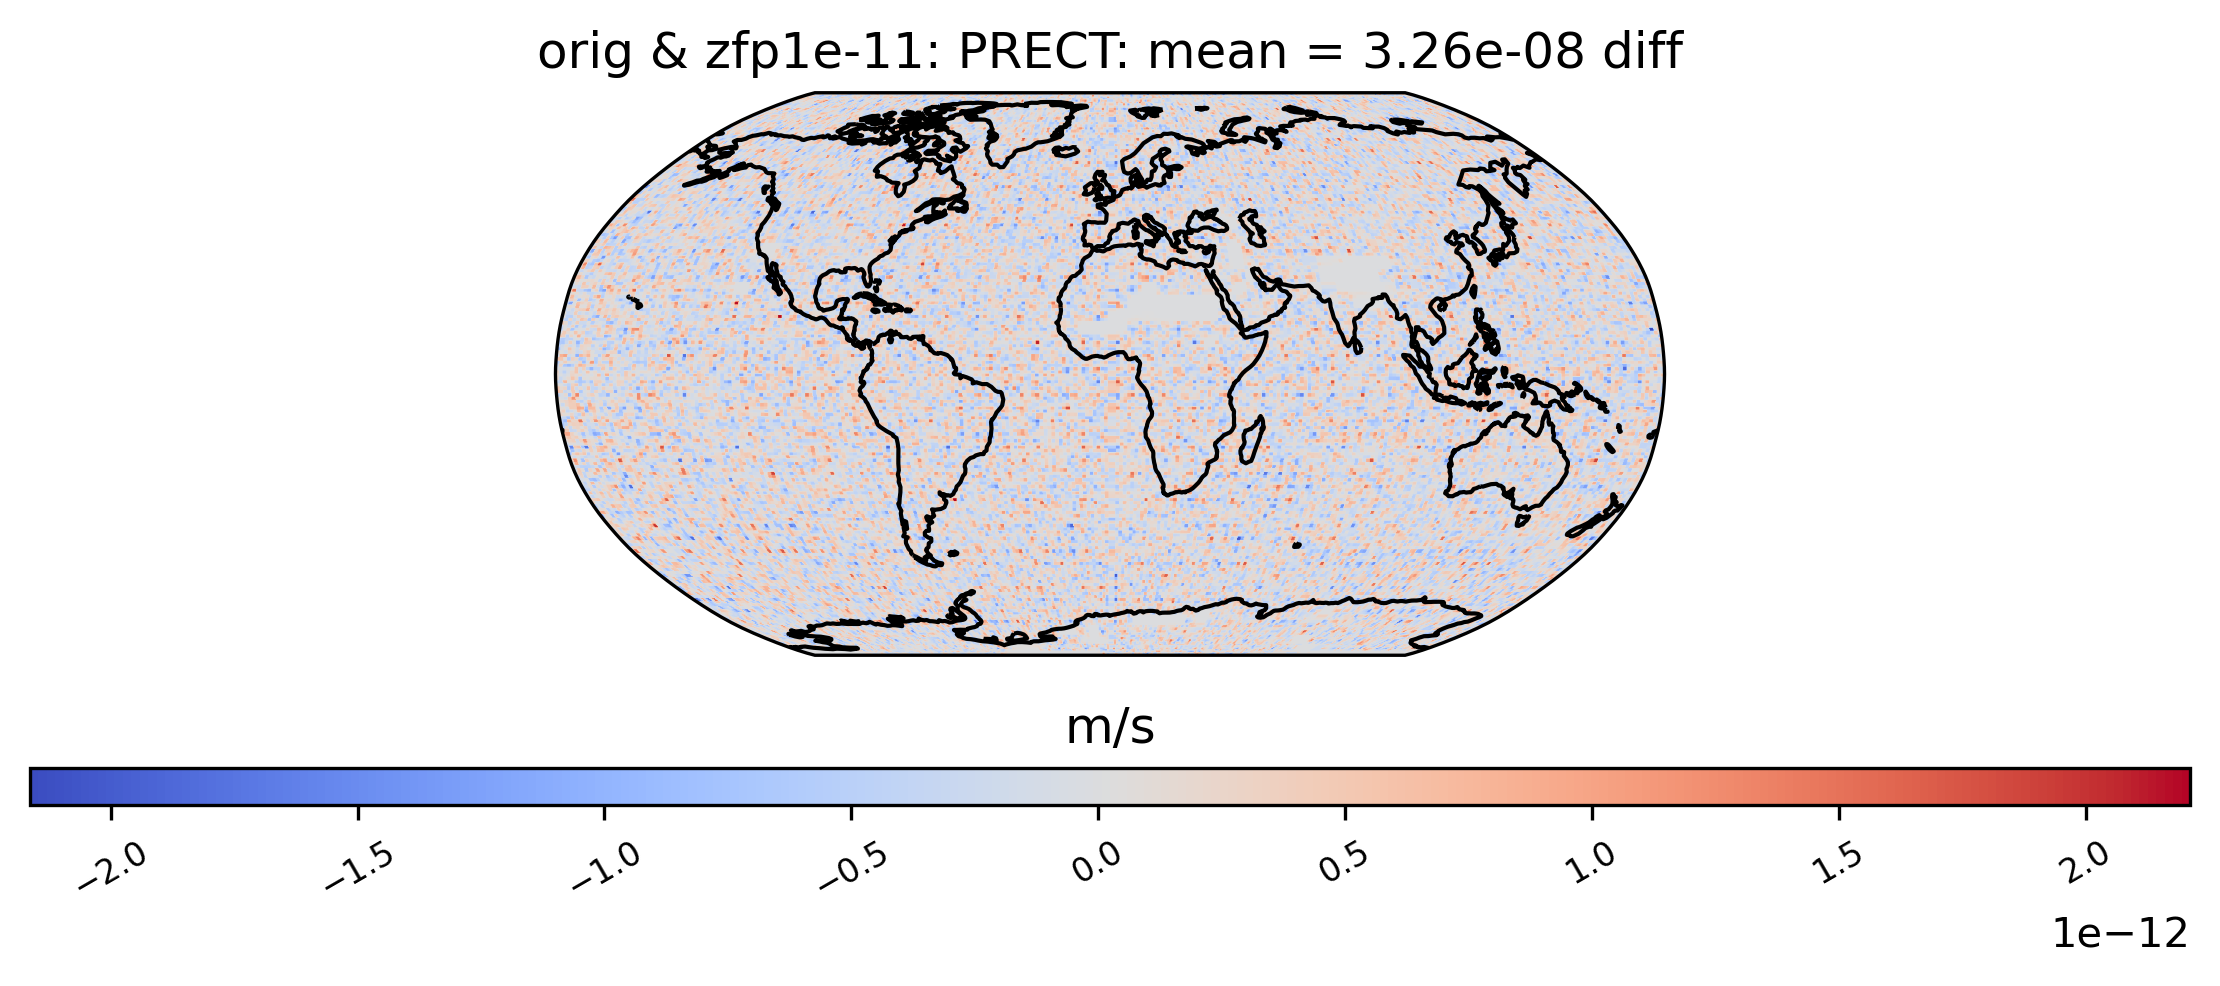

In [17]:
# make a difference plot
ldcpy.plot(
    prect_col,
    "PRECT",
    sets=["orig", "zfp1e-11"],
    calc="mean",
    plot_type="spatial",
    calc_type="diff",
    start=0,
    end=1,
)

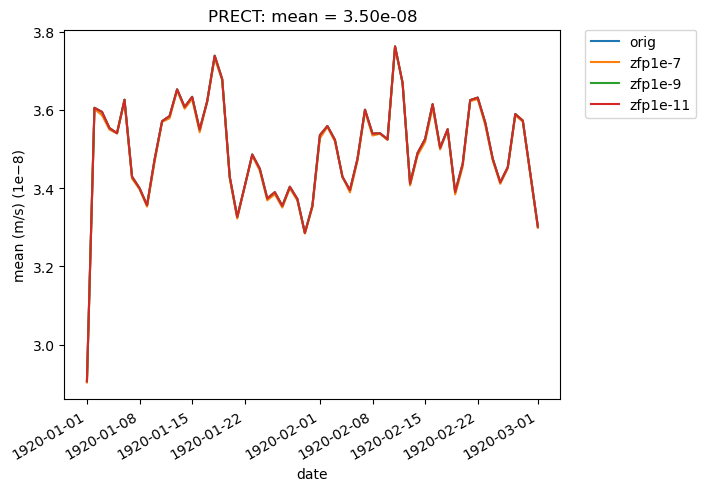

In [18]:
# Time-series plot of PRECT mean in prect_col datasets
ldcpy.plot(
    prect_col,
    "PRECT",
    sets=["orig", "zfp1e-7", "zfp1e-9", "zfp1e-11"],
    calc="mean",
    plot_type="time_series",
)